In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import scipy.stats # При работе со статистикой


In [2]:
df = pd.read_csv('telecom_users.csv')
df

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


Описание данных:

customerID - ID клиента
gender  - пол клиента (мужчина / женщина)
SeniorCitizen - клиент на пенсии (1, 0)
Partner - клиент состоит в браке (Да, Нет)
Dependents - наличие иждивенцев (Да, Нет)
tenure - сколько месяцев человек был клиентом компании
PhoneService - подключена ли телефонная служба (Да, Нет).
MultipleLines - подключено несколько телефонных линий (Да, Нет, Нет телефонной связи).
InternetService - интернет-провайдер клиента (DSL, оптоволокно, Нет).
OnlineSecurity - подключена служба онлайн-безопасности ( Да, Нет, Нет интернет-сервиса)
OnlineBackup - активирована ли онлайн-служба резервного копирования (Да, Нет, Нет интернет-сервиса)
DeviceProtection - есть ли у клиента страхование оборудования (Да, Нет, Нет интернет-сервиса)
TechSupport - это подключенная служба технической поддержки (Да, Нет, Нет Интернет-службы)
StreamingTV - это подключенная служба потокового телевидения (Да, Нет, Нет Интернет-службы)
StreamingMovies - активирована служба потокового кино (Да, Нет, Нет Интернет-службы )
Contract - тип контракта с клиентом (помесячно, один год, два года)
PaperlessBilling - использует ли клиент безбумажный биллинг (да, нет)
PaymentMethod - метод оплаты (электронный чек, почтовый чек, банковский перевод (автоматический), Кредитная карта (автоматически)).
MonthlyCharges - текущий ежемесячный платеж.
TotalCharges - общая сумма, которую клиент заплатил за услуги за все время
Churn - был ли отток (да или нет)

In [3]:
# удалим лишние столбцы, не вляющие на результат анализа данных

In [4]:
df = df.drop(['Unnamed: 0', 'customerID'], axis=1)


In [5]:
# текст в столбцах заменим на числовые значения

In [6]:
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

df['Partner'] = df['Partner'].replace('Yes', 1)
df['Partner'] = df['Partner'].replace('No', 0)

df['Dependents'] = df['Dependents'].replace('Yes', 1)
df['Dependents'] = df['Dependents'].replace('No', 0)

df['PhoneService'] = df['PhoneService'].replace('Yes', 1)
df['PhoneService'] = df['PhoneService'].replace('No', 0)

df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 0)
df['MultipleLines'] = df['MultipleLines'].replace('Yes', 1)
df['MultipleLines'] = df['MultipleLines'].replace('No', 0)

df['InternetService'] = df['InternetService'].replace('Fiber optic', 1)
df['InternetService'] = df['InternetService'].replace('DSL', 2)
df['InternetService'] = df['InternetService'].replace('No', 0)

df['OnlineSecurity'] = df['OnlineSecurity'].replace('Yes', 1)
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No', 0)
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 0)

df['OnlineBackup'] = df['OnlineBackup'].replace('Yes', 1)
df['OnlineBackup'] = df['OnlineBackup'].replace('No', 0)
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', 0)

df['DeviceProtection'] = df['DeviceProtection'].replace('Yes', 1)
df['DeviceProtection'] = df['DeviceProtection'].replace('No', 0)
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 0)

df['TechSupport'] = df['TechSupport'].replace('Yes', 1)
df['TechSupport'] = df['TechSupport'].replace('No', 0)
df['TechSupport'] = df['TechSupport'].replace('No internet service', 0)

df['StreamingTV'] = df['StreamingTV'].replace('Yes', 1)
df['StreamingTV'] = df['StreamingTV'].replace('No', 0)
df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 0)

df['StreamingMovies'] = df['StreamingMovies'].replace('Yes', 1)
df['StreamingMovies'] = df['StreamingMovies'].replace('No', 0)
df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service', 0)

df['Contract'] = df['Contract'].replace('Month-to-month', 1)
df['Contract'] = df['Contract'].replace('One year', 12)
df['Contract'] = df['Contract'].replace('Two year', 24)

df['PaperlessBilling'] = df['PaperlessBilling'].replace('Yes', 1)
df['PaperlessBilling'] = df['PaperlessBilling'].replace('No', 0)

df['PaymentMethod'] = df['PaymentMethod'].replace('Credit card (automatic)', 1)
df['PaymentMethod'] = df['PaymentMethod'].replace('Bank transfer (automatic)', 2)
df['PaymentMethod'] = df['PaymentMethod'].replace('Electronic check', 3)
df['PaymentMethod'] = df['PaymentMethod'].replace('Mailed check', 4)

df['Churn'] = df['Churn'].replace('Yes', 1)
df['Churn'] = df['Churn'].replace('No', 0)

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,1,0,0,0,0,0,0,0,24,0,1,24.10,1734.65,0
1,0,0,0,0,44,1,0,1,0,1,1,0,1,0,1,1,1,88.15,3973.2,0
2,0,1,1,0,38,1,1,1,0,0,0,0,0,0,1,1,2,74.95,2869.85,1
3,1,0,0,0,4,1,0,2,0,0,0,0,0,1,1,1,3,55.90,238.5,0
4,1,0,0,0,2,1,0,2,1,0,1,0,0,0,1,0,3,53.45,119.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,0,1,1,0,1,1,0,0,0,1,1,1,1,3,95.00,95,1
5982,0,0,1,1,23,1,1,2,1,1,1,1,1,1,24,1,1,91.10,2198.3,0
5983,1,0,1,1,12,1,0,0,0,0,0,0,0,0,1,1,3,21.15,306.05,0
5984,1,1,0,0,12,1,1,1,0,0,1,0,1,1,1,1,3,99.45,1200.15,1


In [7]:
# приведем все данные к числовому формату

In [8]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['TotalCharges'] = df['TotalCharges'].astype(float)


In [9]:
#данные могут содержать строки с Nan, чтобы их устранить, нужно использовать следующую команду

In [10]:
df.dropna()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,1,0,0,0,0,0,0,0,24,0,1,24.10,1734.65,0
1,0,0,0,0,44,1,0,1,0,1,1,0,1,0,1,1,1,88.15,3973.20,0
2,0,1,1,0,38,1,1,1,0,0,0,0,0,0,1,1,2,74.95,2869.85,1
3,1,0,0,0,4,1,0,2,0,0,0,0,0,1,1,1,3,55.90,238.50,0
4,1,0,0,0,2,1,0,2,1,0,1,0,0,0,1,0,3,53.45,119.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,0,1,1,0,1,1,0,0,0,1,1,1,1,3,95.00,95.00,1
5982,0,0,1,1,23,1,1,2,1,1,1,1,1,1,24,1,1,91.10,2198.30,0
5983,1,0,1,1,12,1,0,0,0,0,0,0,0,0,1,1,3,21.15,306.05,0
5984,1,1,0,0,12,1,1,1,0,0,1,0,1,1,1,1,3,99.45,1200.15,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   int64  
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   int64  
 3   Dependents        5986 non-null   int64  
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   int64  
 6   MultipleLines     5986 non-null   int64  
 7   InternetService   5986 non-null   int64  
 8   OnlineSecurity    5986 non-null   int64  
 9   OnlineBackup      5986 non-null   int64  
 10  DeviceProtection  5986 non-null   int64  
 11  TechSupport       5986 non-null   int64  
 12  StreamingTV       5986 non-null   int64  
 13  StreamingMovies   5986 non-null   int64  
 14  Contract          5986 non-null   int64  
 15  PaperlessBilling  5986 non-null   int64  
 16  PaymentMethod     5986 non-null   int64  


In [12]:
#описательная статистика. Нужна?

In [13]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.509522,0.161377,0.485132,0.299198,32.468760,0.901437,0.425660,1.129803,0.286168,0.349148,0.343301,0.289843,0.385232,0.390745,8.881557,0.589375,2.574841,64.802213,2294.221559,0.265119
std,0.499951,0.367909,0.499821,0.457945,24.516391,0.298100,0.494484,0.737824,0.452007,0.476741,0.474851,0.453727,0.486691,0.487958,9.541196,0.491988,1.066461,30.114702,2274.164124,0.441433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,35.650000,401.587500,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,70.400000,1408.575000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,3.000000,89.900000,3841.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24.000000,1.000000,4.000000,118.750000,8684.800000,1.000000


In [14]:
print(df.tenure.mode()[0])
print(df.tenure.mean())
print(df.tenure.median())

1
32.46876044102907
29.0


In [15]:
print(df.MonthlyCharges.round().mode()[0])
print(df.MonthlyCharges.mean())
print(df.MonthlyCharges.median())

20.0
64.8022134981624
70.4


In [16]:
print(df.TotalCharges.round().mode()[0])
print(df.TotalCharges.mean())
print(df.TotalCharges.median())

20.0
2294.2215586368197
1408.575


In [ ]:
# нужно ли делать проверку и приводить распределение к нормальному?

In [17]:
#рассчитаем и визиализируем корреляционную матрицу для количественных переменных.

In [18]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.007447,-0.007791,0.009083,0.003207,-0.004913,-0.000853,0.001858,-0.022042,-0.018858,-0.004975,-0.010327,-0.009585,-0.008748,-0.002198,-0.013990,0.008378,-0.014286,-0.003664,-0.009548
SeniorCitizen,-0.007447,1.000000,0.014867,-0.214233,0.005468,0.009464,0.132999,0.033614,-0.037615,0.063561,0.061565,-0.061045,0.102519,0.116841,-0.149106,0.155691,-0.031639,0.219387,0.093807,0.150097
Partner,-0.007791,0.014867,1.000000,0.449029,0.381976,0.024926,0.149325,-0.006319,0.153067,0.149407,0.152803,0.125468,0.130013,0.120763,0.299910,-0.018037,-0.150879,0.104006,0.321349,-0.146840
Dependents,0.009083,-0.214233,0.449029,1.000000,0.163710,-0.000579,-0.022399,-0.046719,0.085138,0.021946,0.009334,0.067460,-0.018705,-0.038750,0.245775,-0.112405,-0.052529,-0.115803,0.062691,-0.160204
tenure,0.003207,0.005468,0.381976,0.163710,1.000000,0.010392,0.339181,0.030184,0.331981,0.358248,0.364085,0.329410,0.284979,0.297389,0.669871,0.006569,-0.362731,0.256983,0.827756,-0.348469
PhoneService,-0.004913,0.009464,0.024926,-0.000579,0.010392,1.000000,0.284667,-0.390024,-0.089481,-0.049382,-0.072536,-0.090169,-0.022703,-0.030394,0.005412,0.021340,0.005863,0.251029,0.117165,0.009421
MultipleLines,-0.000853,0.132999,0.149325,-0.022399,0.339181,0.284667,1.000000,-0.014993,0.103793,0.209348,0.203705,0.105362,0.253013,0.262018,0.111371,0.169139,-0.163393,0.494525,0.475213,0.036342
InternetService,0.001858,0.033614,-0.006319,-0.046719,0.030184,-0.390024,-0.014993,1.000000,0.387598,0.316218,0.306767,0.384703,0.243199,0.254966,-0.101346,0.137651,-0.093357,0.320206,0.173623,0.047198
OnlineSecurity,-0.022042,-0.037615,0.153067,0.085138,0.331981,-0.089481,0.103793,0.387598,1.000000,0.286817,0.283300,0.352356,0.187675,0.198972,0.244694,0.004057,-0.155873,0.303575,0.417388,-0.174301
OnlineBackup,-0.018858,0.063561,0.149407,0.021946,0.358248,-0.049382,0.209348,0.316218,0.286817,1.000000,0.307406,0.289065,0.283627,0.283952,0.153415,0.124097,-0.170697,0.445749,0.506818,-0.082648


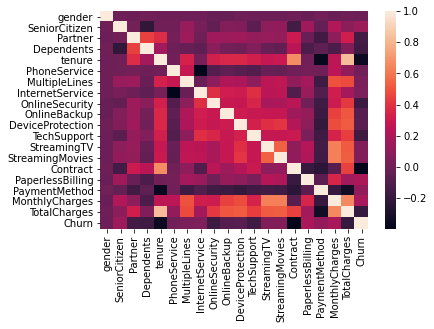

In [19]:
sns.heatmap(df.corr())

In [20]:
#для построения модели берем не все признаки, а только те, которые наиболее сильно скоррелированы с зависимой переменной churn (corr > 0.15)

In [ ]:
#стоит ли переменные добавлять постепенно? чтобы на каждом шаге оценивать улучшается качество модели или нет?

In [39]:
y = df['Churn']
X = df[['SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges' ]]


In [40]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model = LogisticRegression()

In [43]:
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LogisticRegression()

In [46]:
model.predict(X_test) #прогноз

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
# Оцениваем качество
from sklearn.metrics import accuracy_score

In [48]:
# Оцениваем качество на выборке для обучения
accuracy_score(y_train, model.predict(X_train))

0.7937947494033413

In [49]:
# Оцениваем качество на выборке для тестирования
accuracy_score(y_test, model.predict(X_test))

0.7900890868596881